In [1]:
import cuqi
import numpy as np
import os
import sys
sys.path.append(os.path.abspath('..'))
from utilities import TableAutomization as TA
import benchmarksClass as BC 

In [3]:
target_heatstep = BC.HeatStep()
x0 = BC.HeatStep().x0

Sample 101 / 101

Average acceptance rate: 0.09 

Sample 101 / 101

Average acceptance rate all components: 0.06 

Sample 101 / 101

Average acceptance rate: 0.06 

Sample 101 / 101

Average acceptance rate all components: 0.10000000000000002 

Sample 101 / 101

Average acceptance rate: 0.07 

Sample 101 / 101

Average acceptance rate all components: 0.05666666666666667 



/Users/naoki/Desktop/CUQIpy_project/CUQIpy/cuqi/model/_model.py:14: SyntaxWarning: invalid escape sequence '\m'
  """Generic model defined by a forward operator.
/Users/naoki/Desktop/CUQIpy_project/CUQIpy/cuqi/geometry/_geometry.py:753: SyntaxWarning: invalid escape sequence '\s'
  """
/Users/naoki/Desktop/CUQIpy_project/CUQIpy/cuqi/geometry/_geometry.py:922: SyntaxWarning: invalid escape sequence '\s'
  '''


ValueError: pars must have shape (3,) or (3,)+(n,) where n is the number of parameter vectors

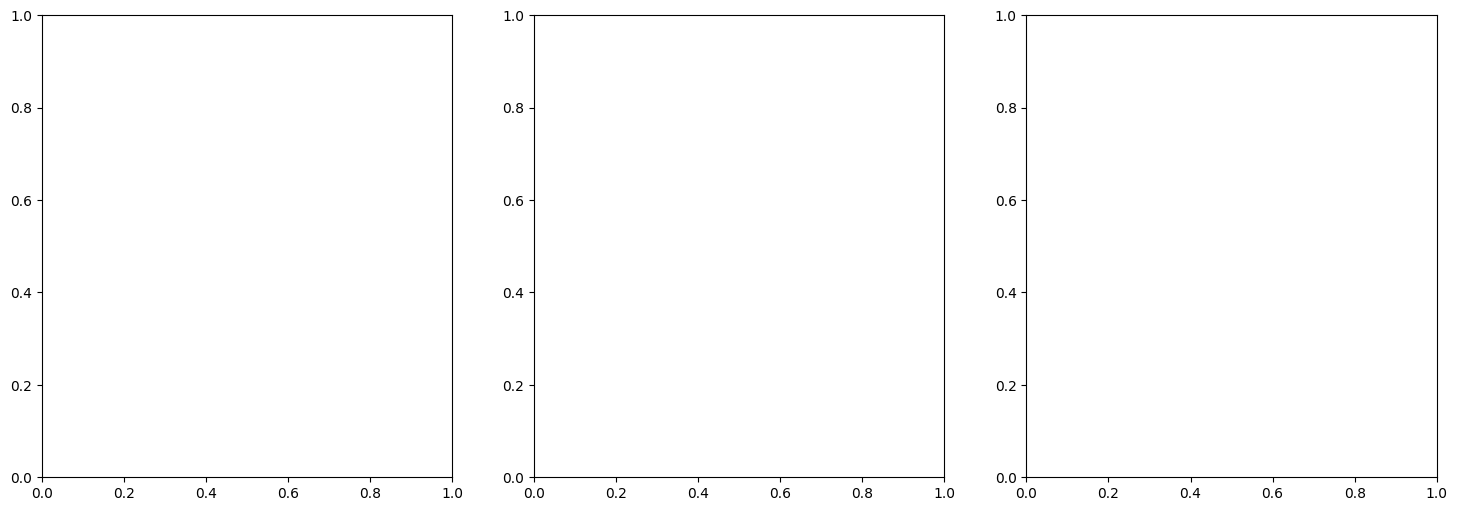

In [6]:
df, (fig, axs) = TA.create_comparison(target_heatstep, x0 = x0,scale = [1,1,0.1,0.2,1], Ns = 100, Nb= 1, seed = 12,chains=3,selected_methods=["MH_fixed", "CWMH"])